# Climate Hackathon
This notebook serves as the main interaction point for the model. 

See the README.md and diagrams for more information about the model's structure.

In [31]:
from model.types import ModelConfig, ClimateRiskType
from model.model import ClimateInsuranceModel

import mesa
import pandas as pd
import seaborn as sns

## Usage example

In [3]:
conf = ModelConfig(
    n_households=1000,
    n_insurers=5,
    initial_insurer_capital=100000.0,
    climate_change_rate=0.01,
    grid_width=50,
    grid_height=50,
    uk_shapefile_path="data/input/Regions_Dec_2020_EN_BUC/RGN_DEC_2020_EN_BUC.shp",
    base_risk_levels={
        ClimateRiskType.FLOOD: 0.02,
        ClimateRiskType.SUBSIDENCE: 0.01,
        ClimateRiskType.STORM: 0.03,
    },
)

In [4]:
ClimateModel = ClimateInsuranceModel(conf)

/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_0 is being placed with
place_agent() despite already having the position (0, 0). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(cell, pos)
/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_1 is being placed with
place_agent() despite already having the position (0, 1). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(cell, pos)
/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_2 is being placed with
place_agent() despite already having the position (0, 2). In most
cases, you'd want to clear the current position with remove_agent()
befor

In [6]:
print(dir(ClimateModel))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_advance_time', '_agents', '_agents_by_type', '_all_agents', '_calculate_mean_climate_risk', '_create_grid_cells', '_create_households', '_create_insurers', '_get_random_valid_position', '_seed', '_setup_agent_registration', '_steps', '_time', 'agent_types', 'agents', 'agents_by_type', 'apply_climate_shock', 'config', 'current_id', 'datacollector', 'deregister_agent', 'get_agents_of_type', 'grid', 'initialize_data_collector', 'insurers', 'next_id', 'random', 'register_agent', 'reset_randomizer', 'run_model', 'running', 'schedule', 'step', 'uk_boundaries']


## Batch run and write outputs

See [**this link**](https://mesa.readthedocs.io/stable/tutorials/intro_tutorial.html#batch-run) for more info

In [11]:
conf = ModelConfig(
    n_households=1000,
    n_insurers=5,
    initial_insurer_capital=100000.0,
    climate_change_rate=0.01,
    grid_width=50,
    grid_height=50,
    uk_shapefile_path="data/input/Regions_Dec_2020_EN_BUC/RGN_DEC_2020_EN_BUC.shp",
    base_risk_levels={
        ClimateRiskType.FLOOD: 0.02,
        ClimateRiskType.SUBSIDENCE: 0.01,
        ClimateRiskType.STORM: 0.03,
    },
)

# Create the required dictionary of model inputs
params = {'config': conf}

# Will probably need to extract these out of the class to allow for parametrisation by mesa itself.

In [12]:
results = mesa.batch_run(
    ClimateInsuranceModel,
    parameters=params,
    iterations=1, # Currently not providing parameters as a range
    data_collection_period=1, # Collect data after the first step
    max_steps=100,
    display_progress=True,
)

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_0 is being placed with
place_agent() despite already having the position (0, 0). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(cell, pos)
/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_1 is being placed with
place_agent() despite already having the position (0, 1). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(cell, pos)
/Users/lukasalemu/Documents/00. Bank of England/02. Development/climate-hackathon-24/model/model.py:39: UserWarning: Agent cell_0_2 is being placed with
place_agent() despite already having the position (0, 2). In most
cases, you'd want to clear the current position with remove_agent()
befor

In [39]:
results_df = pd.DataFrame(results)
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354005 entries, 0 to 354004
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RunId                  354005 non-null  int64  
 1   iteration              354005 non-null  int64  
 2   Step                   354005 non-null  int64  
 3   config                 354005 non-null  object 
 4   Mean_Premium           354005 non-null  float64
 5   Total_Insurer_Capital  354005 non-null  float64
 6   Mean_Climate_Risk      354005 non-null  float64
 7   AgentID                354005 non-null  object 
 8   Capital                505 non-null     float64
 9   Claims_Paid            505 non-null     float64
 10  Premiums_Collected     505 non-null     float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.7+ MB


<Axes: xlabel='Step'>

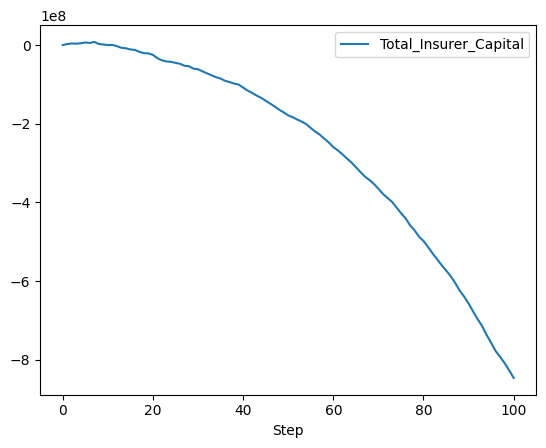

In [35]:
results_df[['Step', 'Total_Insurer_Capital']].groupby('Step').mean().plot()

<Axes: xlabel='Step'>

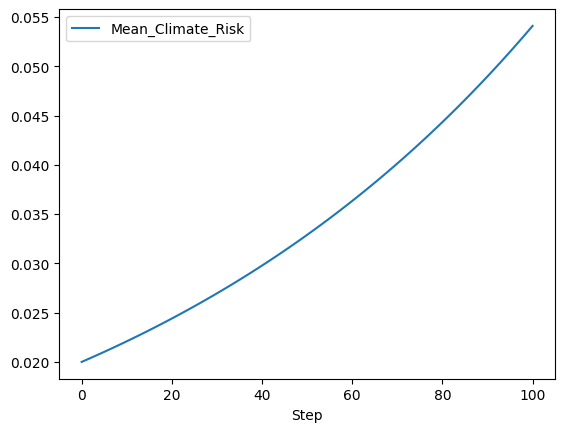

In [36]:
results_df[['Step', 'Mean_Climate_Risk']].groupby('Step').mean().plot()

<Axes: xlabel='Step'>

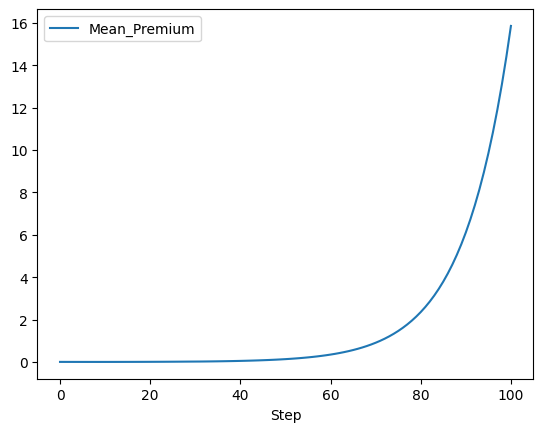

In [38]:
results_df[['Step', 'Mean_Premium']].groupby('Step').mean().plot()